# Exercise 1
 <p><div class="lev1"><a href="#Task-A.-Another-LEGO-brick-in-the-wall"><span class="toc-item-num">Task A.&nbsp;&nbsp;</span>Another LEGO brick in the wall</a></div>
 <p><div class="lev1"><a href="#Task-B.-Drop-the-Bike"><span class="toc-item-num">Task B.&nbsp;&nbsp;</span>Drop the Bike</a></div>

In [1]:
# Settings
%matplotlib inline

# Imports
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from datetime import datetime, date, time
import seaborn as sns

pd.options.mode.chained_assignment = None

In [2]:
DATA_FOLDER = 'data'

## Task A. Another LEGO brick in the wall

LEGO is a popular brand of toy building bricks. They are often sold in sets in order to build a specific object. Each set contains a number of parts in different shapes, sizes and colors. This database contains information on which parts are included in different LEGO sets. It was originally compiled to help people who owned some LEGO sets already figure out what other sets they could build with the pieces they had.

This dataset contains the official LEGO colors, parts, inventories (i.e., sets of LEGO parts which assembled create an object in the LEGO world) and sets (i.e., sets of LEGO inventories which assembled create a LEGO ecosystem). The schema of the dataset can be shown in the following UML diagram: 

![lego-schema](lego-schema.png)

In this task you have to apply the following Data Wrangling pipeline:
1. Load your data into `Pandas`
* Explore it and clean its dirty parts
* Use it to answer a set of queries

Each of these subtasks are described in detail below.

### A1. Loading phase
Load all the csv files into different `DataFrames`. Use meaningful names for your `DataFrames` (e.g., the respective filenames).

*Hint: You can load files without first unzipping them (for `Pandas` version >= 0.18.1).*

In [3]:
LEGO_DATA_FOLDER = DATA_FOLDER + '/lego'

In [4]:
#load the zip compressed csv files
colors=pd.read_csv(LEGO_DATA_FOLDER+"/colors.csv.zip",compression='zip')
inventories=pd.read_csv(LEGO_DATA_FOLDER+"/inventories.csv.zip", compression='zip')
inventory_parts=pd.read_csv(LEGO_DATA_FOLDER+"/inventory_parts.csv.zip", compression='zip')
inventory_sets=pd.read_csv(LEGO_DATA_FOLDER+"/inventory_sets.csv.zip", compression='zip')
part_categories=pd.read_csv(LEGO_DATA_FOLDER+"/part_categories.csv.zip", compression='zip')
parts=pd.read_csv(LEGO_DATA_FOLDER+"/parts.csv.zip", compression='zip')
sets=pd.read_csv(LEGO_DATA_FOLDER+"/sets.csv.zip", compression='zip')
themes=pd.read_csv(LEGO_DATA_FOLDER+"/themes.csv.zip",compression='zip')

### A2. Cleaning phase
Explore the following columns from your dataset:

1. sets: year
* inventory_parts: quantity

What is the time range of the sets? 
What is the average quantity of the inventory parts? 
Do you see any inconsistencies? 
Provide code that detects and cleans such inconsistencies and validates the coherence of your dataset. 

### A2 - 1

In [5]:
# 1. sets:year
# Data information
print(sets.head(20))
# Cleaning
sets['year'] = pd.to_numeric(sets['year'], errors='coerce')
sets['year'] = sets.year.apply(lambda x: np.nan if(x>2018 or x<0) else x)
sets = sets.dropna()
# Describe year of sets
sets['year'].describe()

         id                               name   year  theme_id  num_parts
0      00-1                    Weetabix Castle    70s       414        471
1    0011-2                  Town Mini-Figures   1978        84         12
2    0011-3         Castle 2 for 1 Bonus Offer   1987       199          2
3    0012-1                 Space Mini-Figures   1979       143         12
4    0013-1                 Space Mini-Figures   1979       143         12
5    0014-1                 Space Mini-Figures   1979       143         12
6    0015-1                 Space Mini-Figures   1979       143         18
7    0016-1                Castle Mini Figures  19788       186         15
8      00-2       Weetabix Promotional House 1   1976       413        147
9      00-3       Weetabix Promotional House 2   1976       413        149
10     00-4      Weetabix Promotional Windmill   1976       413        126
11    005-1    Basic Building Set in Cardboard   1965       366         35
12     00-6              

count    8588.000000
mean     2000.272357
std        14.124189
min      1950.000000
25%      1993.000000
50%      2004.000000
75%      2011.000000
max      2017.000000
Name: year, dtype: float64

1        1978.0
2        1987.0
3        1979.0
4        1979.0
5        1979.0
6        1979.0
8        1976.0
9        1976.0
10       1976.0
11       1965.0
12       1985.0
13       1976.0
14       1965.0
15       1968.0
16       1968.0
17       1968.0
18       1999.0
19       1968.0
20       1968.0
21       1968.0
22       1968.0
23       1967.0
24       1969.0
25       2001.0
26       2001.0
27       2001.0
28       2001.0
29       2001.0
31       2001.0
32       2001.0
          ...  
11631    2013.0
11632    2015.0
11633    2016.0
11634    2016.0
11635    2016.0
11637    2015.0
11638    2015.0
11639    2015.0
11640    2014.0
11641    2014.0
11642    2015.0
11644    1991.0
11646    2012.0
11648    1995.0
11649    2003.0
11650    2000.0
11653    1998.0
11655    1985.0
11656    2001.0
11657    2000.0
11658    2000.0
11659    1997.0
11660    2006.0
11661    1997.0
11662    2000.0
11664    1959.0
11665    2006.0
11666    2009.0
11670    2010.0
11672    1996.0
Name: year, Length: 8588

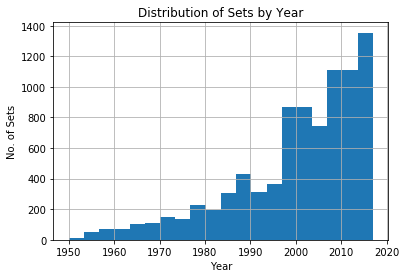

In [28]:
# plot the histogram

sets['year'].hist(bins=20)
plt.xlabel('Year')
plt.ylabel('No. of Sets')
plt.title('Distribution of Sets by Year')

### A2 - 2

In [7]:
# 2. Inventory Parts: Quantity
# data information
print(inventory_parts['quantity'].head(20))
#data cleaning
inventory_parts['quantity'] = inventory_parts['quantity'].apply(lambda x: np.nan if(x==float('-inf')) else x)
inventory_parts = inventory_parts.dropna()
# Describe quantity
inventory_parts['quantity'].describe()

0     1.000000
1     1.000000
2     1.000000
3     1.000000
4     1.000000
5     1.000000
6     1.000000
7     1.000000
8     1.000000
9         -inf
10    1.000000
11    4.000000
12    1.000000
13    1.000000
14    1.000000
15        -inf
16    5.000000
17    3.000000
18    1.000000
19    1.000000
Name: quantity, dtype: float64


count    418455.000000
mean          3.836938
std           9.642451
min           1.000000
25%           1.000000
50%           1.000000
75%           4.000000
max        1440.000000
Name: quantity, dtype: float64

In [8]:
inventory_parts.quantity.median()

1.0

Text(0.5,1,'Distribution of Nr. of inventory parts')

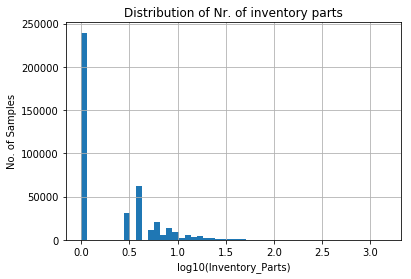

In [9]:
# plot the histogram

inventory_parts['quantity'].apply(np.log10).hist(bins=50)
plt.xlabel('log10(Inventory_Parts)')
plt.ylabel('No. of Samples')
plt.title('Distribution of Nr. of inventory parts')

__\*Approach\*__

**Sets->Year**

We can see from the first instruction that there are at least 3 ways the year is inconsistent, also, years are in strings and not ints.

1. Negative numbers: These most likely represent "upto", eg. "-2015" means up to 2015 
* Decade formatting, eg. "70s"
* Typos: They are difficult to assume what was really meant, eg. does 19788 mean 1978 or 1988?

From the description after removing the faulty samples, we can see that we still have more than 8000 samples, which is large enough to draw statistical conclusions. Changing the values to what we belive them to be could introduce unwanted bias.

From the Histogram and `.describe()` method, we see that set production has started in 1950 and generally increased since then. Still today, LEGO is creating new sets
    
**Inventory Parts->Quantity**   
We can see that some values are set to `-inf`. These values have to be filtered out.
After filtering the corrupted/wrong values, we can get general information about the data using `.describe()` and plot a histogram. It appears that many parts are only in inventory in very low quantities (1), however some parts are stored in large quantities. It is therefore better to display the histogram in log-scale. A logarithm of base 10 is chosen for interpretability.
The mean inventory is 3.8 items. The median is 1 items, which confirms our observation that many parts have only 1 in stock. To decide whether a value of 1 corresponds to an error or to a stock of one item would have to be analysed with the storage manager.

### A3. Querying phase
Answer the following queries using the functionality of `Pandas`:

1. List the ids of the inventories that belong to sets that contain cars. (*Hint: Find a smart way to distinguish which sets contain cars based on the sets' name*).
* Plot the distribution of part categories as a (horizontal) bar chart. Restrict yourself to the 20 largest part categories (in terms of the number of parts belonging to the category).
* Find the dominant color of each set. Then, plot using a (horizontal) bar chart, the number of sets per dominant color. Color each bar with the respective color that it represents.
* Create a scatter plot of the *luminance*\* of the sets vs their publishing year. What do you observe for the years 1980-1981? How do you interpret what you see?

\*The luminance of a color is a [measure of brightness](https://en.wikipedia.org/wiki/Luminance) which, given its RGB representation, can be computed as follows:

$luminance = \sqrt{0.299*R^2 + 0.587*G^2 + 0.114*B^2}$

### A3 - 1

In [10]:
# 1 :

# Join the inventories with the sets
inventoryid_name = inventory_sets.merge(sets, left_on='set_id', right_on='id')[['inventory_id', 'name']]

# Use a regex to get only inventory ids that are in a "car set"    
sets_with_cars = inventoryid_name[inventoryid_name.name.str.contains('(\s)((cars?)|(trucks?))(\s|$)', regex=True, flags=re.IGNORECASE)]

# Show it nicely
sets_with_cars.set_index('inventory_id').sort_index().head(10)

/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  import sys


name
inventory_id                           
528                          Family Car
908                  Armored Car Action
908                  Surveillance Truck
1334          Fire Truck Holiday Bauble
1371                   Fire Chief's Car
1371                         Police Car
1401                           Fire Car
1418                           Fire Car
1716                           Race Car
1716                    Race Car Repair

__\*Approach\*__

To get the ids of the inventories that belongs to sets that contains cars, we need two tables : *inventory_sets* (to get the inventory id), and *sets* (to get the set name). 

Once we have joined them, we use a regular expression to find all entries which set name contains the word "car" or "truck" (Including plural forms and capital letter or not), while making sure that we don't count the entries where "car" is a substring of another word like for example in "cards".

### A3 - 2

Text(0.5,1,'The most used Part Categories')

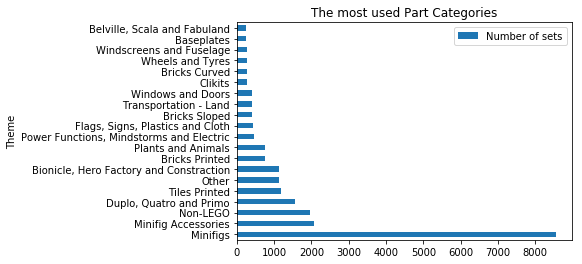

In [11]:
# 2 :

# Join the parts with their categories
joined_categories = parts.merge(part_categories, left_on='part_cat_id', right_on='id')[['id_y','name_y']]

# Group the data by category name, and count how many parts are in each category.
grouped = joined_categories.groupby(['name_y']).count()

# Set nice names
grouped.index.names = ['Theme']
grouped.columns = ['Number of sets']

# Only keep the 20 biggest categories
top_groups = grouped.sort_values(by=['Number of sets'], ascending=False).head(20)

# Plot the data
top_groups.plot.barh()
plt.title('The most used Part Categories')

__\*Approach\*__

This time, we need parts and part_categories. After joining them, we can use a `groupby()` followed by the `count()` function to get the number of parts by category. 

Since we only want the biggest categories, we sort the resulting table, and only keep the 20 largest sets. The horizontal bar chart can be obtained using `.plot.barh()`.

We see that "Minifigs" is the largest categoy by far, which isn't unexpected since almost every lego box contains some characters.

### A3 - 3

Text(0,0.5,'Dominant Color')

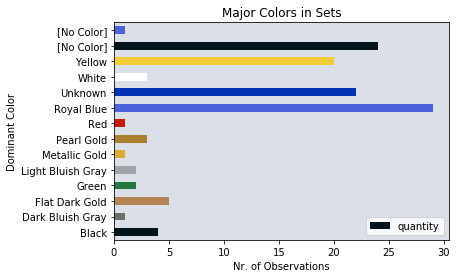

In [12]:
# 3 : 

# First join, sets with inventory_sets, only keep usefull columns
sets_inv_sets = pd.merge(sets, inventory_sets, left_on='id', right_on='set_id', how='inner')[['inventory_id', 'num_parts', 'set_id', 'quantity', 'year']]

# Second join, previous with inventory_parts
sets_inv_sets_inv_parts = pd.merge(sets_inv_sets, inventory_parts, left_on='inventory_id', right_on='inventory_id', how='inner')

# Third join, previous with colors
sets_inv_sets_inv_parts_colors = pd.merge(sets_inv_sets_inv_parts,colors, left_on='color_id', right_on='id').drop_duplicates()

# Only keep useful columns
sets_color = sets_inv_sets_inv_parts_colors[['num_parts', 'set_id', 'color_id', 'name', 'rgb', 'quantity_x', 'quantity_y', 'year']].drop_duplicates()

# COmpute the total quantity of parts for each set / color
sets_color['quantity'] = sets_color.apply(lambda row: row.quantity_x * row.quantity_y, axis=1)


# For each set, only keep the color with the highest number of parts
quantity_by_color = sets_color.groupby(['set_id']).max(key='quantity')

# Remove unwanted values
quantity_by_color = quantity_by_color[['name', 'rgb', 'quantity']]

# Groupby color
sets_by_color = quantity_by_color.groupby(['name', 'rgb'], as_index=False).count().set_index('name')

# Transform the color to the correct syntax to be used for the plot
sets_by_color.rgb = sets_by_color.rgb.apply(lambda x : '#' + str(x.lower()))

# Plot the data and change the background color so we can see the white bar
plot = sets_by_color.plot.barh(color=[sets_by_color.rgb.tolist()])
plot.set_facecolor('#dadfe8')
plt.title('Major Colors in Sets')
plt.xlabel('Nr. of Observations')
plt.ylabel('Dominant Color')

__\*Approach\*__

For this we had to merge all the tables between *sets* and *colors*, *inventory_sets* and *inventory_parts* included. But this was problematic, since a lot of inventory ids from inventory_parts weren't in inventory_sets. (There are ~ 11000 entries in each of the tables, but only ~ 350 after joining them.) As a result, we went from many thousands of sets to ony a few hundreds that were associated with colors. Since a lot of sets didn't have any color, our results are to be taken with a grain of salt. 

We see that blue (as well as yellow and black) is often a dominant, which is not surprising since they are common colors, but it is a bit strange that red and green aren't as frequent. 

### A3 - 4

Text(0.5,1,'Luminance Distribution')

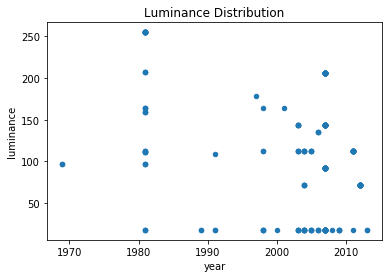

In [13]:
# 4 : 

luminance = sets_color.copy()
luminance['red']   = sets_color[['set_id', 'year', 'rgb']].apply(lambda row: int(row.rgb[:2], 16), axis=1)
luminance['green'] = sets_color[['set_id', 'year', 'rgb']].apply(lambda row: int(row.rgb[2:4], 16), axis=1)
luminance['blue']  = sets_color[['set_id', 'year', 'rgb']].apply(lambda row: int(row.rgb[4:6], 16), axis=1)

# Compute luminance
luminance['luminance'] = np.sqrt(0.299*luminance.red**2 + 0.587*luminance.green**2 + 0.114*luminance.blue**2)

# Plot
luminance.plot.scatter(x='year', y='luminance')
plt.title('Luminance Distribution')

__\*Approach\*__

For this we reuse the sets_color computed in A3 - 3, where each set is associated with it's color. We first extract each color component from the rgb entry, and then compute the luminance. The plot is done using `plot.scatter()`. 

We can see that In 1981, the range of lumincance is very big, which can indicate that they might have tried to diversify their color palette. However, we can see that a lot of data is missing for most of the years, due to the fact that the inventory tables had some missing links between them. This makes the interpretation of what happend in 1981 harder. 

## Task B. Drop the bike

*Los Angeles Metro* has been sharing publicly [anonymized *Metro Bike Share* trip data](https://bikeshare.metro.net/about/data/) under the [Open Database License (ODbL)](http://opendatacommons.org/licenses/odbl/1.0/).

In this task you will again perform data wrangling and interpretation.

### B1. Loading phase
Load the json file into a `DataFrame`.


In [14]:
BIKES_DATA_FOLDER = DATA_FOLDER + '/bikes'

In [15]:
bikes=pd.read_json(BIKES_DATA_FOLDER + "/metro-bike-share-trip-data.json.zip" ,compression='zip')

### B2. Cleaning phase
Describe the type and the value range of each attribute. Indicate and transform the attributes that are `Categorical`. Are there redundant columns in the dataset (i.e., are there columns whose value depends only on the value of another column)? What are the possible pitfalls of having such columns? Reduce *data redundancy* by extracting such columns to separate `DataFrames`. Which of the two formats (the initial one or the one with reduced data redundancy) is more susceptible to inconsistencies? At the end print for each `Dataframe` the *type of each column* and it's *shape*.

In [16]:
print(bikes.dtypes)

Bike ID                       float64
Duration                        int64
End Time                       object
Ending Station ID             float64
Ending Station Latitude       float64
Ending Station Longitude      float64
Passholder Type                object
Plan Duration                 float64
Start Time                     object
Starting Station ID           float64
Starting Station Latitude     float64
Starting Station Longitude    float64
Trip ID                         int64
Trip Route Category            object
dtype: object


In [17]:
# remove spaces to use attribute notation
bikes_clean = bikes.copy()
bikes_clean.columns = [c.replace(' ', '_') for c in bikes_clean.columns]

# Transform the dates into datetime format
bikes_clean['Start_Time'] = bikes_clean.Start_Time.map(lambda x: datetime.strptime(x, "%Y-%m-%dT%H:%M:%S"))

# create categoricals
bikes_clean['Bike_ID'] = bikes_clean.Bike_ID.astype('category')
bikes_clean['Ending_Station_ID'] = bikes_clean.Ending_Station_ID.astype('category')
bikes_clean['Starting_Station_ID'] = bikes_clean.Starting_Station_ID.astype('category')
bikes_clean['Passholder_Type'] = bikes_clean.Passholder_Type.astype('category')
bikes_clean['Trip_ID'] = bikes_clean.Trip_ID.astype('category')
bikes_clean['Trip_Route_Category'] = bikes_clean.Trip_Route_Category.astype('category')
print(bikes_clean.dtypes)

# Split stations from the main table
stations_start = bikes_clean[['Starting_Station_ID', 'Starting_Station_Latitude', 'Starting_Station_Longitude']].drop_duplicates()
stations_end = bikes_clean[['Ending_Station_ID', 'Ending_Station_Latitude', 'Ending_Station_Longitude']].drop_duplicates()
stations_start.columns = ['Station_ID', 'Station_Latitude', 'Station_Longitude']
stations_end.columns = ['Station_ID', 'Station_Latitude', 'Station_Longitude']
stations = pd.concat([stations_end, stations_start]).reset_index(drop=True)
print('\nStations : \n')
print(stations.head())

# Split plans type from the main table, manually repair Staff Annual duration
plans = bikes_clean[['Passholder_Type', 'Plan_Duration']].drop_duplicates().reset_index(drop=True)
plans['Plan_Duration'][plans['Passholder_Type'] == 'Staff Annual']=365.0
plans=plans.dropna().reset_index(drop=True)
print('\nPlans : \n')
print(plans)

bikes_reduced = bikes_clean.drop(columns=['Plan_Duration', 'Starting_Station_Latitude', 'Starting_Station_Longitude', 'Ending_Station_Latitude', 'Ending_Station_Longitude'])
print('\nBikes Reduced : \n')
print(bikes_reduced.head())

Bike_ID                             category
Duration                               int64
End_Time                              object
Ending_Station_ID                   category
Ending_Station_Latitude              float64
Ending_Station_Longitude             float64
Passholder_Type                     category
Plan_Duration                        float64
Start_Time                    datetime64[ns]
Starting_Station_ID                 category
Starting_Station_Latitude            float64
Starting_Station_Longitude           float64
Trip_ID                             category
Trip_Route_Category                 category
dtype: object

Stations : 

  Station_ID  Station_Latitude  Station_Longitude
0     3014.0         34.056610         -118.23721
1     3016.0         34.052898         -118.24156
2     3032.0         34.049889         -118.25588
3     3054.0         34.039219         -118.23649
4     3005.0         34.048550         -118.25905

Plans : 

  Passholder_Type  Plan_Duratio

__\*Approach\*__

**Dataset information**
From the `.describe()` and `.dtypes`, we can see that the categorical values are the Passholder Type and Trip Route Category. Also Bike ID, Station ID and Trip ID are categorical. The transformed the Starting Time to a datetime type to handle it more easily later.

**Redundancy**
The ending station latitude and logitude only depend on the ending station id (same for starting station). This mean that we can remove the logitute/latitude information from this table and put them in a separated table.

The plan duration also completly depends on the passholder type.

The duration can be computed using the start and end time, but we keep it for convinience to avoid computing it every time. 

The Trip Route Category could also be calculated from the starting and ending station ID (i.e if they are the same, it is a round trip), but we decided to keep it in the table so we don't have to compute it every time we do a query, similarly to duration.

### B3. Querying phase
Answer the following queries using the functionality of `Pandas`.

1. Plot the *distribution* of the number of outgoing trips from each station in a histogram with 20 bins (Hint: each bin describes a range of counts, not stations).
* Plot histograms for the *duration* and *trip starting hour in the day* attributes. For both the *duration*  and the *trip starting hour* use *discrete 1-hour intervals*. What do you observe in each plot? What are some popular values in the *duration* plot? Explain the local maxima and the trends you observe on the *trip starting hour* plot based on human behavior.
* For each *trip route category*, calculate the proportion of trips by *passholder type* and present your results in *a stacked bar chart with normalized height*.
* Considering only trips that begin in the morning hours (before noon), plot in *a single bar chart* the proportion of trips by *passholder type* and *trip route category*. Explain any outliers you observe.
* Separate the hours of the day into two intervals that have (approximately) the same number of bikes leaving the stations. For each of the two intervals calculate the proportion of trips by *passholder type* and *trip route category*. Present your results in a `DataFrame` which has a unique, non-composite index. Does the proportion of trips depend on whether it is the first or second hour interval? Would the company have any significant benefit by creating a more complex paying scheme where monthly pass users would pay less in the first interval and (equally) more on the second one? Assume that the number of trips per interval will not change if the scheme changes.

### B3 - 1

Text(0.5,1,'Distribution of No. of Outgoing Trips')

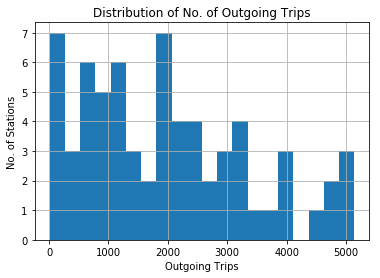

In [18]:
# 1 :
by_station = bikes_reduced.groupby(['Starting_Station_ID']).size().reset_index(name='counts')
by_station.hist(bins=20)
plt.xlabel('Outgoing Trips')
plt.ylabel('No. of Stations')
plt.title('Distribution of No. of Outgoing Trips')

__\*Approach\*__

We group the trips by starting station ID. Taking the size of each group gives us the number of trips that start at each station. When plotting a histogram of the counts, we get in the X axis the number of outgoing trips, on the Y axis we get the number of stations in the bin.

We see that there seems to be a decreasing tendency: A lot of stations have only few outgoing trips, few stations have many outgoing trips. In a network analysis, these stations would most likely be observed as hubs.

### B3 - 2

Text(0.5,1,'Distribution of Starting Time')

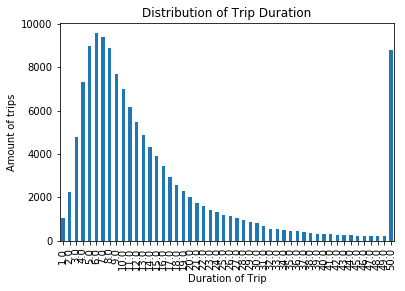

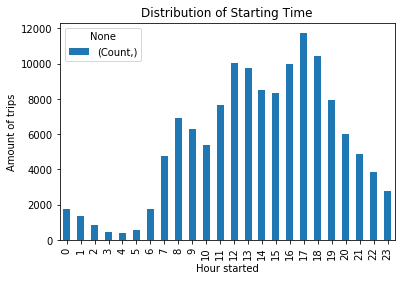

In [19]:
# 2 :
time = bikes_reduced.copy()
time['Start_Time'] = bikes_reduced['Start_Time'].apply(lambda x: x.hour)


duration=bikes_reduced.copy()
duration['Duration'] = duration['Duration'].apply(lambda x: x/60)
duration=duration.groupby([duration.Duration])['Start_Time'].count()
duration[50]=duration[51:].sum()
ax = duration[:50].plot.bar(color='C0')
ax.set_xlabel('Duration of Trip')
ax.set_ylabel('Amount of trips')
plt.title('Distribution of Trip Duration')

starting_time = time.groupby([time.Start_Time])[['Duration']].count()
starting_time.columns = [['Count']]
ax = starting_time.plot.bar(title='Trips started')
ax.set_xlabel('Hour started')
ax.set_ylabel('Amount of trips')
plt.title('Distribution of Starting Time')

__\*Approach\*__

First, we extract the starting hour. Then we group by this value. We count the trips to get the number of outgoing trips at each hour. Plotting a histogram shows us that during the day more trips are taken. The local extremes are in the morning at 8, at noon an in the evening at 5. These correspond to what we would expect to see as "rush-hour" times. When people go to work, go to eat lunch and go home at hours 8,12 and 17 respectively.

The same procedure is repeated for the Duration distribution.
We truncate the duration at 50h, since we are most interested in the short trips (Trips that last longer than 50h are attributed to 50h trips in order to not loose the data). We see that most people take a bike for ~6 hours

### B3 - 3

Text(0.5,0,'Trip Route Category')

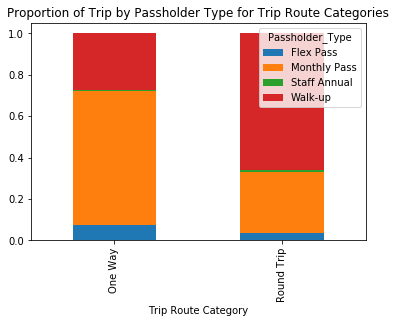

In [20]:
#3 :

#Group by (Passholder_Type, Trip_Route_Category) and get number of trips of each
by_passholder_type = bikes_reduced.groupby(['Passholder_Type', 'Trip_Route_Category'], as_index=False)[['Bike_ID']].count()

#Rename columns
by_passholder_type.columns = ['Passholder_Type', 'Trip_Route_Category', 'Ratio']

#Normalize by dividing by total number of trips on that given Trip_Route_Category
totalSize = bikes_reduced.groupby(['Trip_Route_Category'])[['Duration']].count()
totalSize.columns = ['Total_Size']

by_passholder_type = by_passholder_type.merge(totalSize, on='Trip_Route_Category')
by_passholder_type['Ratio'] = by_passholder_type.apply(lambda x: x['Ratio']/x['Total_Size'], axis=1)

#Clean useless column
by_passholder_type = by_passholder_type.drop(['Total_Size'], axis=1)


#Pivot columns to plot them on one stack per Passholder_Type
by_passholder_type.pivot(index='Trip_Route_Category', columns='Passholder_Type', values='Ratio').plot.bar(stacked=True)
plt.title('Proportion of Trip by Passholder Type for Trip Route Categories')
plt.xlabel('Trip Route Category')

__\*Approach\*__

We first need to group the data by their Passholder_Type and Trip_Route_Category, and then count the amount of trips of each group.

Then to normalize the data, we must divide each value by the total count of trip of the corresponding Trip_Route_Category.
What is left is some renaming and pivoting to display the results inside a single stacked bar plot.

### B3 - 4

Text(0.5,1,'Distribution of Pass-Type & Trip Route Category in the morning')

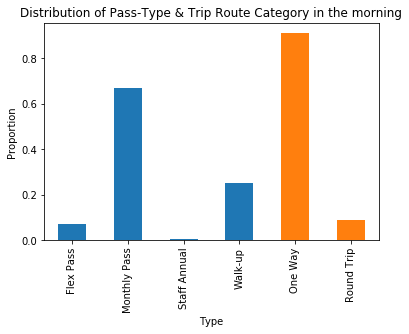

In [21]:
#4 :

#Filter the trips to take only the ones that start before noon (<12)
before_noon = bikes_reduced.copy()
before_noon['Start_Time'] = before_noon['Start_Time'].apply(lambda x: x.hour)
before_noon = before_noon[before_noon['Start_Time'] < 12]

#Count trips per Passholder_Type
by_passholder_type = before_noon.groupby(['Passholder_Type'], as_index=False)[['Duration']].count()
#Count trips per Trip_Route_Category
by_trip_route = before_noon.groupby(['Trip_Route_Category'], as_index=False)[['Duration']].count()

#Concatanate both table into one to display the plot
by_passholder_type.columns = [['Type', 'Ratio']]
by_trip_route.columns = [['Type', 'Ratio']]
both_types = pd.concat([by_passholder_type, by_trip_route], sort=True).reset_index(drop=True)

#Normalize the data
total_entries = before_noon['Passholder_Type'].count()
both_types['Ratio'] = both_types['Ratio'].apply(lambda x: x/total_entries)

#Display the plot of the result
both_types.columns = ['Ratio','Type']
p=both_types.plot.bar(x='Type', color=[['C0','C0','C0','C0','C1','C1']])
p.set_ylabel('Proportion')
p.legend_.remove()
plt.title('Distribution of Pass-Type & Trip Route Category in the morning')

__\*Approach\*__

We first need to filter the data to only take into account the trips that started before noon (hour < 12).
Then we need two separate tables, one grouped by Passholder_Type, the other by Trip_Route_Category and count the trips in each.
In order to display them into a single plot, we have to concat both tables into a single one and normalize it by dividing by the total number of trips.

We can see that there are many one way trips compared to round trips, possibly because people use bikes to go work in the morning and leave it somewhere, going back through another one way trip in the evening.
For the same reason most of the trips are Monthly Pass, people probably use bikes on a daily basis during the morning to go to work and take a monthly pass for it. Flex Pass and Walk-up are probably more used during the afternoon for a non professional use.
Staff annual is extremly low simply because there are not many exisitng staff members/employees existing to even use bikes...

### B3 - 5

In [22]:
#5 :
# Splitting the data into groups
time = bikes_reduced.copy()
time['Start_Time'] = bikes_reduced['Start_Time'].apply(lambda x: x.hour)
time['Group']=time['Start_Time'].apply(lambda x: 1 if x>14 else 2 )
time.Group.mean()
# 1.5 would be perfect

1.5019897754989542

In [23]:
# Calculate ratio
fine=time.groupby(['Group','Passholder_Type','Trip_Route_Category']).count().reset_index()
fine=fine[['Group','Passholder_Type','Trip_Route_Category','Bike_ID']]
coarse=time.groupby(['Group']).count()
coarse=coarse[['Bike_ID']]
fine.columns=['Group','Passholder_Type','Trip_Route_Category','Count']
coarse.columns=['Count_Total']

fine=fine.merge(coarse,left_on='Group',right_index=True)
fine['Ratio'] = fine.apply(lambda x: 100*x.Count/x.Count_Total, axis=1)
fine=fine.drop(columns=['Count','Count_Total'])

In [24]:
# extract groups
group1=fine[fine.Group==1]
group1=group1.drop(columns=['Group']).pivot(index='Passholder_Type', columns='Trip_Route_Category',values='Ratio')
group2=fine[fine.Group==2]
group2=group2.drop(columns=['Group']).pivot(index='Passholder_Type', columns='Trip_Route_Category',values='Ratio')

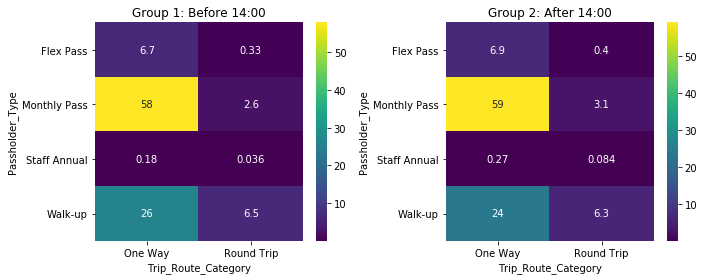

In [25]:
# Display result
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))
sns.heatmap(group1, annot=True, cmap='viridis', ax=ax1)
ax1.set_title('Group 1: Before 14:00')
sns.heatmap(group2, annot=True, cmap='viridis', ax=ax2)
ax2.set_title('Group 2: After 14:00')
plt.tight_layout()

__\*Approach\*__

We chose to split the dat in morning (0:00-14:00) and afternoon/evening. These groups are called 1 and 2 respectively. A perfect split would give an average group of 1.5, so our split is very even (avg~= 1.502).
We calculate the ratio of trips for each parameter combination {Passholder Type, Trip Route Category} as a percentage of the total number of trips (per group).

We split the two groups into seperate dataframes and pivot them for better display. To make the analysis better looking, we use a heatmap to display the ratio in percent of each group. Comparing the two heatmaps, we see that there is no significant difference in the two time-bins. We used seaborn to draw the heatmaps.